## This notebook is dedicated to the exploration of feature importances.
#### It is based on a public tutorial made available on kaggle: https://www.kaggle.com/arthurtok/feature-ranking-rfe-random-forest-linear-models

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from re import sub
from decimal import Decimal
from matplotlib import pyplot as plt
import datetime
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, SGDRegressor
from sklearn.preprocessing import Imputer, StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

from math import sqrt
import tests as t
import re


import nltk
from nltk import word_tokenize, WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import folium

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import xgboost as xgb
pd.set_option('display.max_columns', 106)
import statsmodels.api as sm

import collections

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sousa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sousa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sousa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
porto = pd.read_csv(r"C:\Users\sousa\Desktop\github\Airbnb Tale of 2 cities\Data Portugal\porto_listings.csv")
lisbon = pd.read_csv(r"C:\Users\sousa\Desktop\github\Airbnb Tale of 2 cities\Data Portugal\lisbon_listings.csv")

In [3]:
X_porto = porto.drop('price', 1)
y_porto = porto['price']

X_lisbon = lisbon.drop('price', 1)
y_lisbon = lisbon['price']

In [4]:
# creating a dict to save the importance rankings
feature_rank_porto = {}
feature_rank_lisbon = {}

In [5]:
# creating a function to store feature rankings
def feature_rankings (feature_rank, feat_name, order = 1):
    '''
    Takes in the calculated feature ranking and the feature name and returns a dictionary of the two
    Args:
    feature_rank: calculated rank of a feature
    feat_name: the name of the feature
    Returns: a dictionary with the pairs feature ranking and feature name
    '''
    feature_rank = MinMaxScaler().fit_transform(order*np.array([feature_rank]).T).T[0]
    feature_rank = map(lambda x: round(x,2), feature_rank)
    
    return dict(zip(feat_name, feature_rank))

## Feature Selection using RFE

In [6]:
lr = LinearRegression(normalize=True)
lr.fit(X_porto, y_porto)

rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X_porto, y_porto)

feature_rank_porto["RFE"] = feature_rankings(list(map(float, rfe.ranking_)), X_porto.columns, order=-1)

Fitting estimator with 223 features.
Fitting estimator with 222 features.
Fitting estimator with 221 features.
Fitting estimator with 220 features.
Fitting estimator with 219 features.
Fitting estimator with 218 features.
Fitting estimator with 217 features.
Fitting estimator with 216 features.
Fitting estimator with 215 features.
Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
F

In [7]:
lr.fit(X_lisbon,y_lisbon)

rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X_lisbon, y_lisbon)

feature_rank_lisbon["RFE"] = feature_rankings(list(map(float, rfe.ranking_)), X_lisbon.columns, order=-1)

Fitting estimator with 224 features.
Fitting estimator with 223 features.
Fitting estimator with 222 features.
Fitting estimator with 221 features.
Fitting estimator with 220 features.
Fitting estimator with 219 features.
Fitting estimator with 218 features.
Fitting estimator with 217 features.
Fitting estimator with 216 features.
Fitting estimator with 215 features.
Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
F

#Automatic feature selection using Recursive Feature Elimination wrapper method
#Porto
lr = LinearRegression(normalize = True)
lr.fit(X_porto,y_porto)

rfe_porto = RFE(lr, verbose = 4)

rfe_porto = rfe_porto.fit(X_porto,y_porto)

selected_features_porto = pd.DataFrame({'Feature':list(X_porto.columns),'Ranking':rfe_porto.ranking_})
selected_features_porto.sort_values(by='Ranking')

#Automatic feature selection using Recursive Feature Elimination wrapper method
#Lisbon
lr = LinearRegression(normalize = True)
lr.fit(X_lisbon,y_lisbon)

rfe_lisbon = RFE(lr, verbose = 4)

rfe_lisbon = rfe_lisbon.fit(X_lisbon,y_lisbon)

selected_features_lisbon = pd.DataFrame({'Feature':list(X_lisbon.columns),'Ranking':rfe_lisbon.ranking_})
selected_features_lisbon.sort_values(by='Ranking')

porto_rank_1 = selected_features_porto[selected_features_porto.Ranking < 2]
porto_rank_1.head(30)
#list(porto_rank_1.Feature)

porto_rank_2 = selected_features_porto[selected_features_porto.Ranking < 3]
#porto_rank_2.head(80)
list(porto_rank_2.Feature)

## Feature Selection using Linear Regression

In [8]:
lr.fit(X_porto, y_porto)
feature_rank_porto["LinReg"] = feature_rankings(np.abs(lr.coef_), X_porto.columns)

In [9]:
lr.fit(X_lisbon, y_lisbon)
feature_rank_lisbon["LinReg"] = feature_rankings(np.abs(lr.coef_), X_lisbon.columns)

## Feature Selection using Random Forest

In [10]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=500, verbose=3)
rf.fit(X_porto, y_porto)
feature_rank_porto["RF"] = feature_rankings(rf.feature_importances_, X_porto.columns)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 500building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500building tree 6 of 500


building tree 7 of 500building tree 8 of 500

building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500

building tree 22 of 500
building tree 23 of 500
building tree 24 of 500


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.6s


building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500building tree 47 of 500
building tree 48 of 500

building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    9.0s



building tree 124 of 500
building tree 125 of 500
building tree 126 of 500
building tree 127 of 500
building tree 128 of 500
building tree 129 of 500
building tree 130 of 500
building tree 131 of 500
building tree 132 of 500
building tree 133 of 500
building tree 134 of 500
building tree 135 of 500
building tree 136 of 500
building tree 137 of 500
building tree 138 of 500
building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500

[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   17.8s


building tree 281 of 500
building tree 282 of 500
building tree 283 of 500
building tree 284 of 500
building tree 285 of 500
building tree 286 of 500
building tree 287 of 500
building tree 288 of 500
building tree 289 of 500
building tree 290 of 500
building tree 291 of 500
building tree 292 of 500
building tree 293 of 500
building tree 294 of 500
building tree 295 of 500
building tree 296 of 500
building tree 297 of 500
building tree 298 of 500
building tree 299 of 500
building tree 300 of 500
building tree 301 of 500
building tree 302 of 500
building tree 303 of 500
building tree 304 of 500
building tree 305 of 500
building tree 306 of 500
building tree 307 of 500
building tree 308 of 500
building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500
building tree 314 of 500
building tree 315 of 500
building tree 316 of 500
building tree 317 of 500
building tree 318 of 500
building tree 319 of 500
building tree 320 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   30.2s finished


In [11]:
rf.fit(X_lisbon, y_lisbon)
feature_rank_lisbon["RF"] = feature_rankings(rf.feature_importances_, X_lisbon.columns)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 500building tree 2 of 500building tree 3 of 500

building tree 4 of 500building tree 5 of 500


building tree 6 of 500building tree 7 of 500

building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500building tree 18 of 500

building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.1s


building tree 24 of 500
building tree 25 of 500
building tree 26 of 500building tree 27 of 500

building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500building tree 34 of 500

building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500building tree 59 of 500

building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   21.5s


building tree 121 of 500
building tree 122 of 500
building tree 123 of 500
building tree 124 of 500
building tree 125 of 500
building tree 126 of 500
building tree 127 of 500
building tree 128 of 500
building tree 129 of 500
building tree 130 of 500
building tree 131 of 500
building tree 132 of 500
building tree 133 of 500
building tree 134 of 500
building tree 135 of 500
building tree 136 of 500
building tree 137 of 500
building tree 138 of 500
building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   45.9s


building tree 281 of 500
building tree 282 of 500
building tree 283 of 500
building tree 284 of 500
building tree 285 of 500
building tree 286 of 500
building tree 287 of 500
building tree 288 of 500
building tree 289 of 500
building tree 290 of 500
building tree 291 of 500
building tree 292 of 500
building tree 293 of 500
building tree 294 of 500
building tree 295 of 500
building tree 296 of 500
building tree 297 of 500
building tree 298 of 500
building tree 299 of 500
building tree 300 of 500
building tree 301 of 500
building tree 302 of 500
building tree 303 of 500
building tree 304 of 500
building tree 305 of 500
building tree 306 of 500
building tree 307 of 500
building tree 308 of 500
building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500
building tree 314 of 500
building tree 315 of 500
building tree 316 of 500
building tree 317 of 500
building tree 318 of 500
building tree 319 of 500
building tree 320 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.4min finished


#Porto
rf = RandomForestRegressor(n_estimators = 500, n_jobs=-1, verbose=3)
rf_porto = rf.fit(X_porto,y_porto)


#ranks["RF"] = ranking(rf.feature_importances_, X_porto.columns)
selected_features_porto = pd.DataFrame({'Feature':list(X_porto.columns),'Ranking':ranking(rf.feature_importances_, X_porto.columns)})
selected_features_porto.sort_values(by='Ranking')

#Lisbon
rf = RandomForestRegressor(n_jobs=-1, verbose=3)
rf.fit(X_lisbon,y_lisbon)
ranks["RF"] = ranking(rf.feature_importances_, X_lisbon.columns)

### Displaying the feature selection results Porto

In [32]:
r_porto = {}

In [33]:
for col in X_porto.columns:
    r_porto[col] = round(np.mean([feature_rank_porto[method][col] for method in feature_rank_porto.keys()]), 2)
    
methods = sorted(feature_rank_porto.keys())
feature_rank_porto["Mean"] = r_porto
methods.append("Mean")

print("\t%s" % "\t".join(methods))

for col in X_porto.columns:
    print("%s\t%s" % (col, "\t".join(map(str, [feature_rank_porto[method][col] for method in methods]))))

	LinReg	Mean	RF	RFE	Mean
Unnamed: 0	0.0	0.01	0.0	0.02	0.01
id	0.0	0.0	0.0	0.0	0.0
transit	0.0	0.06	0.0	0.19	0.06
host_id	0.0	0.0	0.0	0.0	0.0
host_response_time	0.0	0.06	0.0	0.17	0.06
host_response_rate	0.0	0.02	0.0	0.05	0.02
host_is_superhost	0.0	0.04	0.0	0.12	0.04
host_listings_count	0.0	0.03	0.0	0.08	0.03
host_has_profile_pic	0.0	0.12	0.0	0.35	0.12
host_identity_verified	0.0	0.04	0.0	0.11	0.04
latitude	0.0	0.12	0.0	0.37	0.12
longitude	0.0	0.1	0.0	0.31	0.1
is_location_exact	0.0	0.05	0.0	0.15	0.05
room_type	0.0	0.09	0.0	0.26	0.09
accommodates	0.0	0.42	0.92	0.33	0.42
bathrooms	0.0	0.12	0.0	0.36	0.12
bedrooms	0.0	0.07	0.07	0.14	0.07
beds	0.0	0.08	0.0	0.23	0.08
security_deposit	0.0	0.04	0.0	0.11	0.04
cleaning_fee	0.0	0.03	0.0	0.09	0.03
guests_included	0.0	0.08	0.01	0.22	0.08
extra_people	0.0	0.04	0.0	0.13	0.04
minimum_nights	0.0	0.03	0.0	0.08	0.03
maximum_nights	0.0	0.0	0.0	0.01	0.0
has_availability	0.3	0.4	0.0	0.89	0.4
availability_365	0.0	0.01	0.0	0.03	0.01
number_of_reviews	0.0	0.01	0.

In [34]:
# Put the mean scores into a Pandas dataframe
meanplot_porto = pd.DataFrame(list(r_porto.items()), columns= ['Feature','Mean_Ranking'])

# Sort the dataframe
meanplot_porto = meanplot_porto.sort_values('Mean_Ranking', ascending=False)

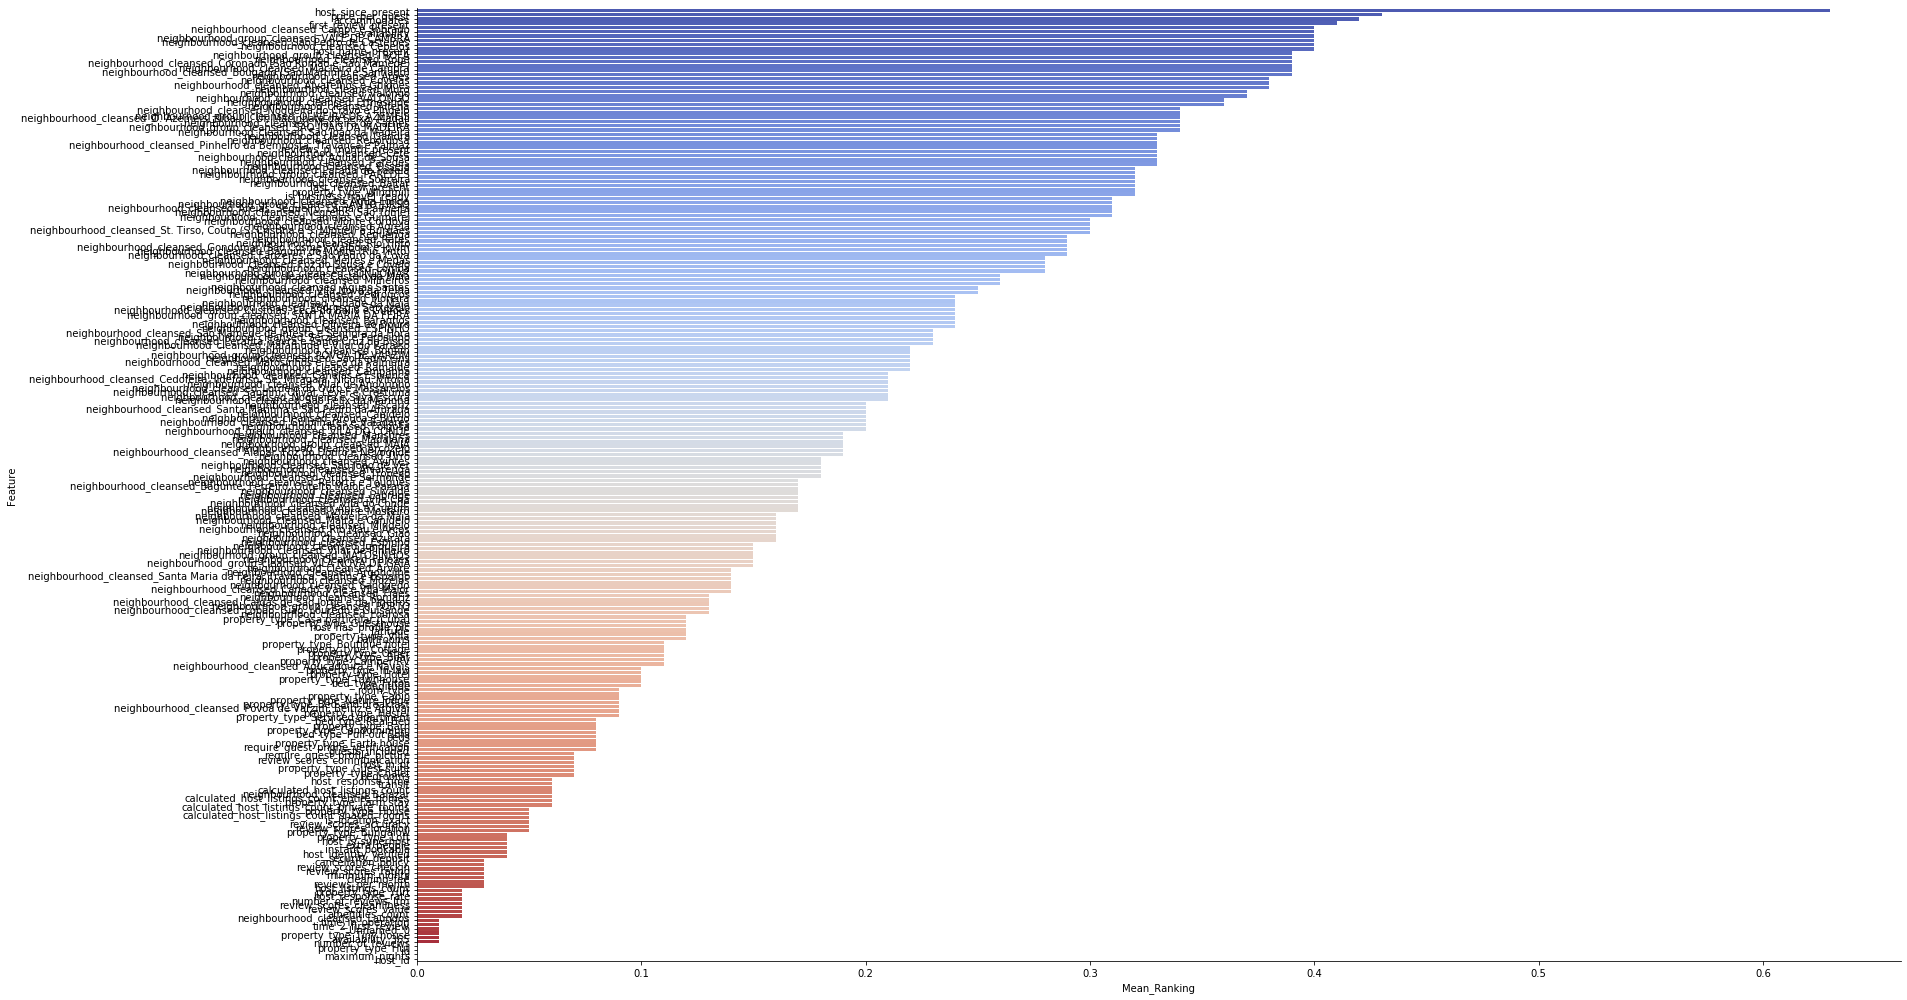

In [35]:
# Let's plot the ranking of the features
sns.factorplot(x="Mean_Ranking", y="Feature", data = meanplot_porto, kind="bar", 
               size=14, aspect=1.9, palette='coolwarm')

In [36]:
meanplot_porto.head(50)

,Feature,Mean_Ranking
48,host_since_present,0.63
222,price_per_guest,0.43
14,accommodates,0.42
47,first_review_present,0.41
90,neighbourhood_cleansed_Campo e Sobrado,0.40
24,has_availability,0.40
63,neighbourhood_group_cleansed_VALE DE CAMBRA,0.40
174,neighbourhood_cleansed_São Pedro de Castelões,0.40
96,neighbourhood_cleansed_Cepelos,0.40
45,host_name_present,0.40


In [37]:
meanplot_porto = meanplot_porto[meanplot_porto.Mean_Ranking > 0.3]

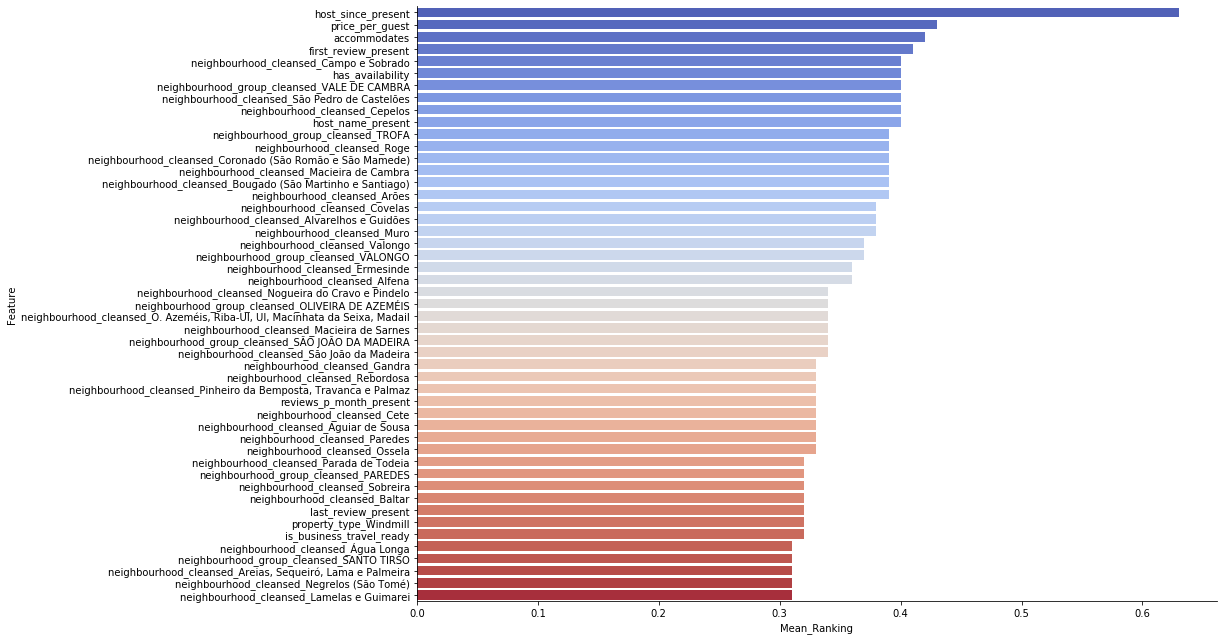

In [41]:
sns.factorplot(x="Mean_Ranking", y="Feature", data = meanplot_porto, kind="bar", size=9, aspect=1.9, palette='coolwarm')

### Displaying the feature selection results Lisbon

In [42]:
r_lisbon = {}

In [43]:
for col in X_lisbon.columns:
    r_lisbon[col] = round(np.mean([feature_rank_lisbon[method][col] for method in feature_rank_lisbon.keys()]), 2)
    
methods = sorted(feature_rank_lisbon.keys())
feature_rank_lisbon["Mean"] = r_lisbon
methods.append("Mean")

print("\t%s" % "\t".join(methods))

for col in X_lisbon.columns:
    print("%s\t%s" % (col, "\t".join(map(str, [feature_rank_lisbon[method][col] for method in methods]))))

	LinReg	RF	RFE	Mean
Unnamed: 0	0.0	0.0	0.02	0.01
id	0.0	0.0	0.01	0.0
transit	0.0	0.0	0.24	0.08
host_id	0.0	0.0	0.0	0.0
host_response_time	0.0	0.0	0.25	0.08
host_response_rate	0.0	0.0	0.06	0.02
host_is_superhost	0.0	0.0	0.19	0.06
host_listings_count	0.0	0.0	0.12	0.04
host_has_profile_pic	0.0	0.0	0.23	0.08
host_identity_verified	0.0	0.0	0.18	0.06
latitude	0.0	0.0	0.14	0.05
longitude	0.0	0.0	0.46	0.15
is_location_exact	0.0	0.0	0.1	0.03
room_type	0.0	0.0	0.3	0.1
accommodates	0.0	1.0	0.4	0.47
bathrooms	0.0	0.0	0.42	0.14
bedrooms	0.0	0.01	0.26	0.09
beds	0.0	0.0	0.15	0.05
security_deposit	0.0	0.0	0.13	0.04
cleaning_fee	0.0	0.0	0.09	0.03
guests_included	0.0	0.0	0.14	0.05
extra_people	0.0	0.0	0.08	0.03
minimum_nights	0.0	0.0	0.09	0.03
maximum_nights	0.0	0.0	0.0	0.0
has_availability	0.26	0.0	0.89	0.38
availability_365	0.0	0.0	0.04	0.01
number_of_reviews	0.0	0.0	0.03	0.01
number_of_reviews_ltm	0.0	0.0	0.06	0.02
review_scores_rating	0.0	0.0	0.12	0.04
review_scores_accuracy	0.0	0.0	0.04	0.01
review

In [44]:
# Put the mean scores into a Pandas dataframe
meanplot_lisbon = pd.DataFrame(list(r_lisbon.items()), columns= ['Feature','Mean_Ranking'])

# Sort the dataframe
meanplot_lisbon = meanplot_lisbon.sort_values('Mean_Ranking', ascending=False)

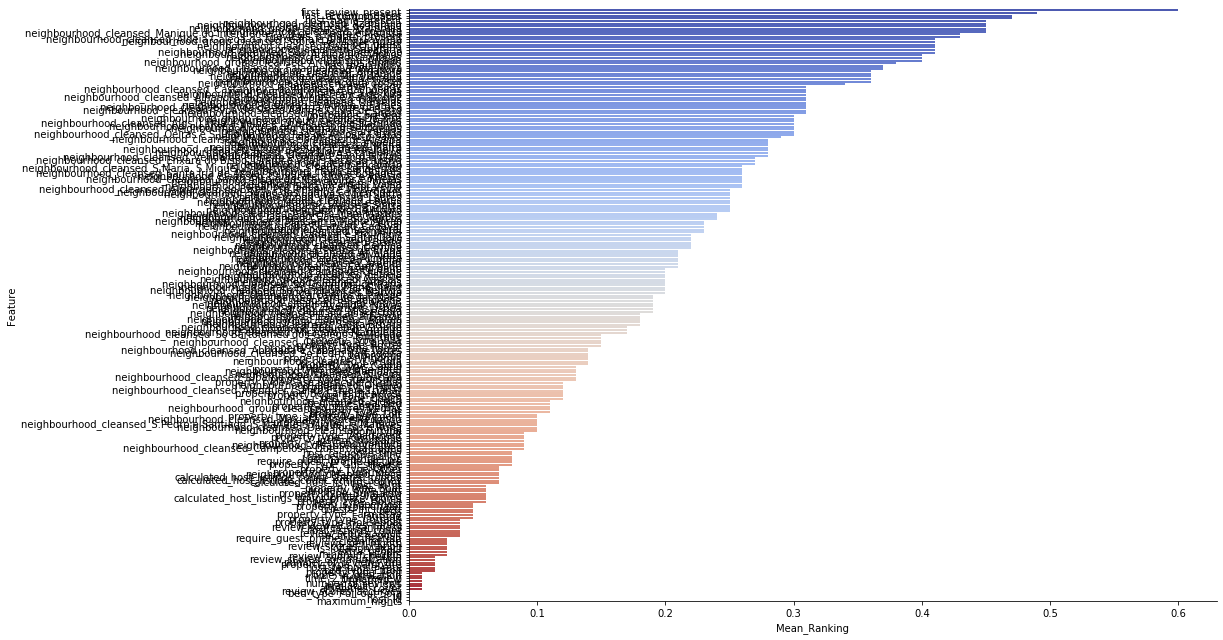

In [45]:
# Let's plot the ranking of the features
sns.factorplot(x="Mean_Ranking", y="Feature", data = meanplot_lisbon, kind="bar", size=9, aspect=1.9, palette='coolwarm')

In [46]:
meanplot_lisbon.head(50)

,Feature,Mean_Ranking
47,first_review_present,0.60
46,last_review_present,0.49
14,accommodates,0.47
45,host_name_present,0.47
86,neighbourhood_cleansed_Azambuja,0.45
174,neighbourhood_cleansed_Vale do Paraso,0.45
53,neighbourhood_group_cleansed_Azambuja,0.45
71,neighbourhood_cleansed_Alcoentre,0.45
126,"neighbourhood_cleansed_Manique do Intendente, ...",0.45
49,reviews_p_month_present,0.43


In [47]:
meanplot_lisbon = meanplot_lisbon[meanplot_lisbon.Mean_Ranking > 0.3]

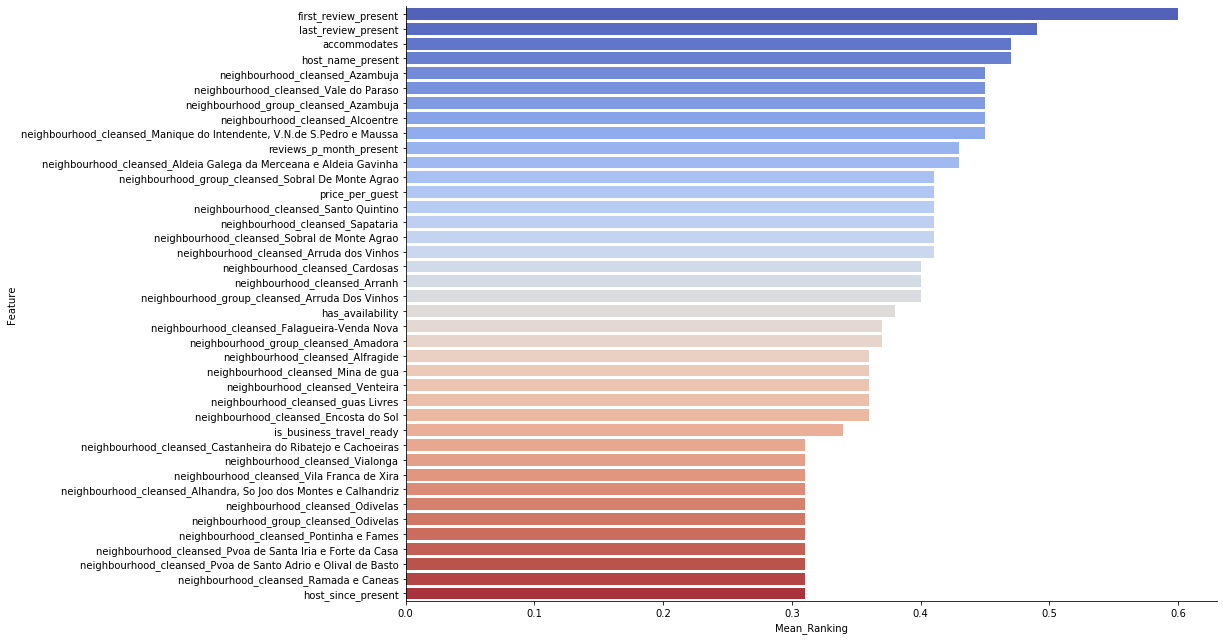

In [49]:
sns.factorplot(x="Mean_Ranking", y="Feature", data = meanplot_lisbon, kind="bar", size=9, aspect=1.9, palette='coolwarm')

## getting a list of the selected features for future model training

In [62]:
meanplot_porto['Feature'].values.tolist()

['host_since_present',
 'price_per_guest',
 'accommodates',
 'first_review_present',
 'neighbourhood_cleansed_Campo e Sobrado',
 'has_availability',
 'neighbourhood_group_cleansed_VALE DE CAMBRA',
 'neighbourhood_cleansed_São Pedro de Castelões',
 'neighbourhood_cleansed_Cepelos',
 'host_name_present',
 'neighbourhood_group_cleansed_TROFA',
 'neighbourhood_cleansed_Roge',
 'neighbourhood_cleansed_Coronado (São Romão e São Mamede)',
 'neighbourhood_cleansed_Macieira de Cambra',
 'neighbourhood_cleansed_Bougado (São Martinho e Santiago)',
 'neighbourhood_cleansed_Arões',
 'neighbourhood_cleansed_Covelas',
 'neighbourhood_cleansed_Alvarelhos e Guidões',
 'neighbourhood_cleansed_Muro',
 'neighbourhood_cleansed_Valongo',
 'neighbourhood_group_cleansed_VALONGO',
 'neighbourhood_cleansed_Ermesinde',
 'neighbourhood_cleansed_Alfena',
 'neighbourhood_cleansed_Nogueira do Cravo e Pindelo',
 'neighbourhood_group_cleansed_OLIVEIRA DE AZEMÉIS',
 'neighbourhood_cleansed_O. Azeméis, Riba-Ul, Ul, Maci

In [63]:
meanplot_lisbon['Feature'].values.tolist()

['first_review_present',
 'last_review_present',
 'accommodates',
 'host_name_present',
 'neighbourhood_cleansed_Azambuja',
 'neighbourhood_cleansed_Vale do Paraso',
 'neighbourhood_group_cleansed_Azambuja',
 'neighbourhood_cleansed_Alcoentre',
 'neighbourhood_cleansed_Manique do Intendente, V.N.de S.Pedro e Maussa',
 'reviews_p_month_present',
 'neighbourhood_cleansed_Aldeia Galega da Merceana e Aldeia Gavinha',
 'neighbourhood_group_cleansed_Sobral De Monte Agrao',
 'price_per_guest',
 'neighbourhood_cleansed_Santo Quintino',
 'neighbourhood_cleansed_Sapataria',
 'neighbourhood_cleansed_Sobral de Monte Agrao',
 'neighbourhood_cleansed_Arruda dos Vinhos',
 'neighbourhood_cleansed_Cardosas',
 'neighbourhood_cleansed_Arranh',
 'neighbourhood_group_cleansed_Arruda Dos Vinhos',
 'has_availability',
 'neighbourhood_cleansed_Falagueira-Venda Nova',
 'neighbourhood_group_cleansed_Amadora',
 'neighbourhood_cleansed_Alfragide',
 'neighbourhood_cleansed_Mina de gua',
 'neighbourhood_cleansed_Ve